In [8]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image
import pandas as pd
import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

In [9]:
from tqdm import tqdm

hop_net = hopfield.HopfieldNetwork()

# ~5m for 300
net_size = 100
img_N = 7

step_size = 20
thresholds = np.linspace(-3,3,step_size)
gradients = np.exp(np.linspace(-5, 5, step_size))

DATA = [[] for x in gradients]
for i, grad in enumerate(tqdm(gradients)):
    for thresh in thresholds:
        params = (grad, thresh)
        white_noise_dataset = np.random.randint(0, 2, size=(img_N, net_size), dtype='int') * 2 - 1
        DATA[i].append(hop_net.run(white_noise_dataset, 
                                    iterations=1000,
                                    params=params,
                                    lr="hebbian", af="async_tanh",
                                    noise_level=.0,
                                    print_info=False))


100%|██████████| 20/20 [01:16<00:00,  3.84s/it]


In [10]:
records = []
idx = 0
heat = np.empty((len(gradients), len(thresholds)))
for i, grad in enumerate(gradients):
    errors = []
    for j, thresh in enumerate(thresholds):
        pm = DATA[i][j]
        # error = 1 - np.mean(np.array(pm.error))
        error = np.array(np.mean(pm.process_energy))
        record = {
            'index':idx,
            'error': error,
            'grad': grad,
            'thresh': thresh
        }
        idx += 1
        records.append(record)
        heat[i,j] = error
        # print(record)
        # errors.append(error)

    # I DONT KNOW WTF IM DOING HELP
    # axs.plot(gradients, errors)
# plt.legend()

df = pd.DataFrame.from_records(records)

Text(69.0, 0.5, 'Thresholds')

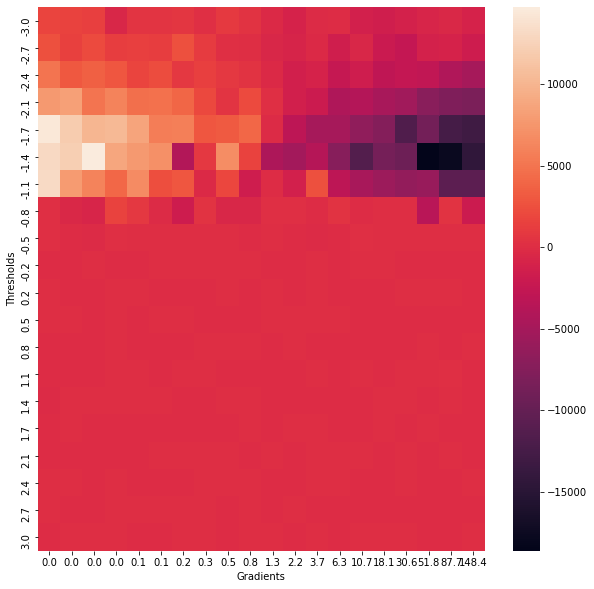

In [13]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
import seaborn as sns
sns.heatmap(heat, ax = ax)
# ax.xaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.set_xticklabels([f"{x:.1f}" for x in gradients])
# ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
ax.set_yticklabels([f"{x:.1f}" for x in thresholds])
# ax.set_yticklabels(thresholds)
ax.set_xlabel("Gradients")
ax.set_ylabel("Thresholds")



In [12]:
records

[{'index': 0,
  'error': array(1819.5376508),
  'grad': 0.006737946999085467,
  'thresh': -3.0},
 {'index': 1,
  'error': array(1610.06044793),
  'grad': 0.006737946999085467,
  'thresh': -2.6842105263157894},
 {'index': 2,
  'error': array(1339.18869971),
  'grad': 0.006737946999085467,
  'thresh': -2.3684210526315788},
 {'index': 3,
  'error': array(-562.20143325),
  'grad': 0.006737946999085467,
  'thresh': -2.0526315789473686},
 {'index': 4,
  'error': array(589.33366577),
  'grad': 0.006737946999085467,
  'thresh': -1.736842105263158},
 {'index': 5,
  'error': array(544.97714926),
  'grad': 0.006737946999085467,
  'thresh': -1.4210526315789473},
 {'index': 6,
  'error': array(678.68209533),
  'grad': 0.006737946999085467,
  'thresh': -1.105263157894737},
 {'index': 7,
  'error': array(235.68262466),
  'grad': 0.006737946999085467,
  'thresh': -0.7894736842105265},
 {'index': 8,
  'error': array(934.76979749),
  'grad': 0.006737946999085467,
  'thresh': -0.47368421052631593},
 {'in